In [1]:
import corner
import emcee
import numpy as np
import pickle
from pathlib import Path

In [2]:
from matplotlib import pyplot as plt
filename = '/Users/franceschi/mysims/IMLup/Til/chain.hdf5'
reader = emcee.backends.HDFBackend(filename)

samples = reader.get_chain(flat=True)
log_prob_samples = reader.get_log_prob(flat=True)
# log_prior_samples = reader.get_blobs(flat=True)

ndim = 7

print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

flat chain shape: (28, 7)
flat log prob shape: (28,)


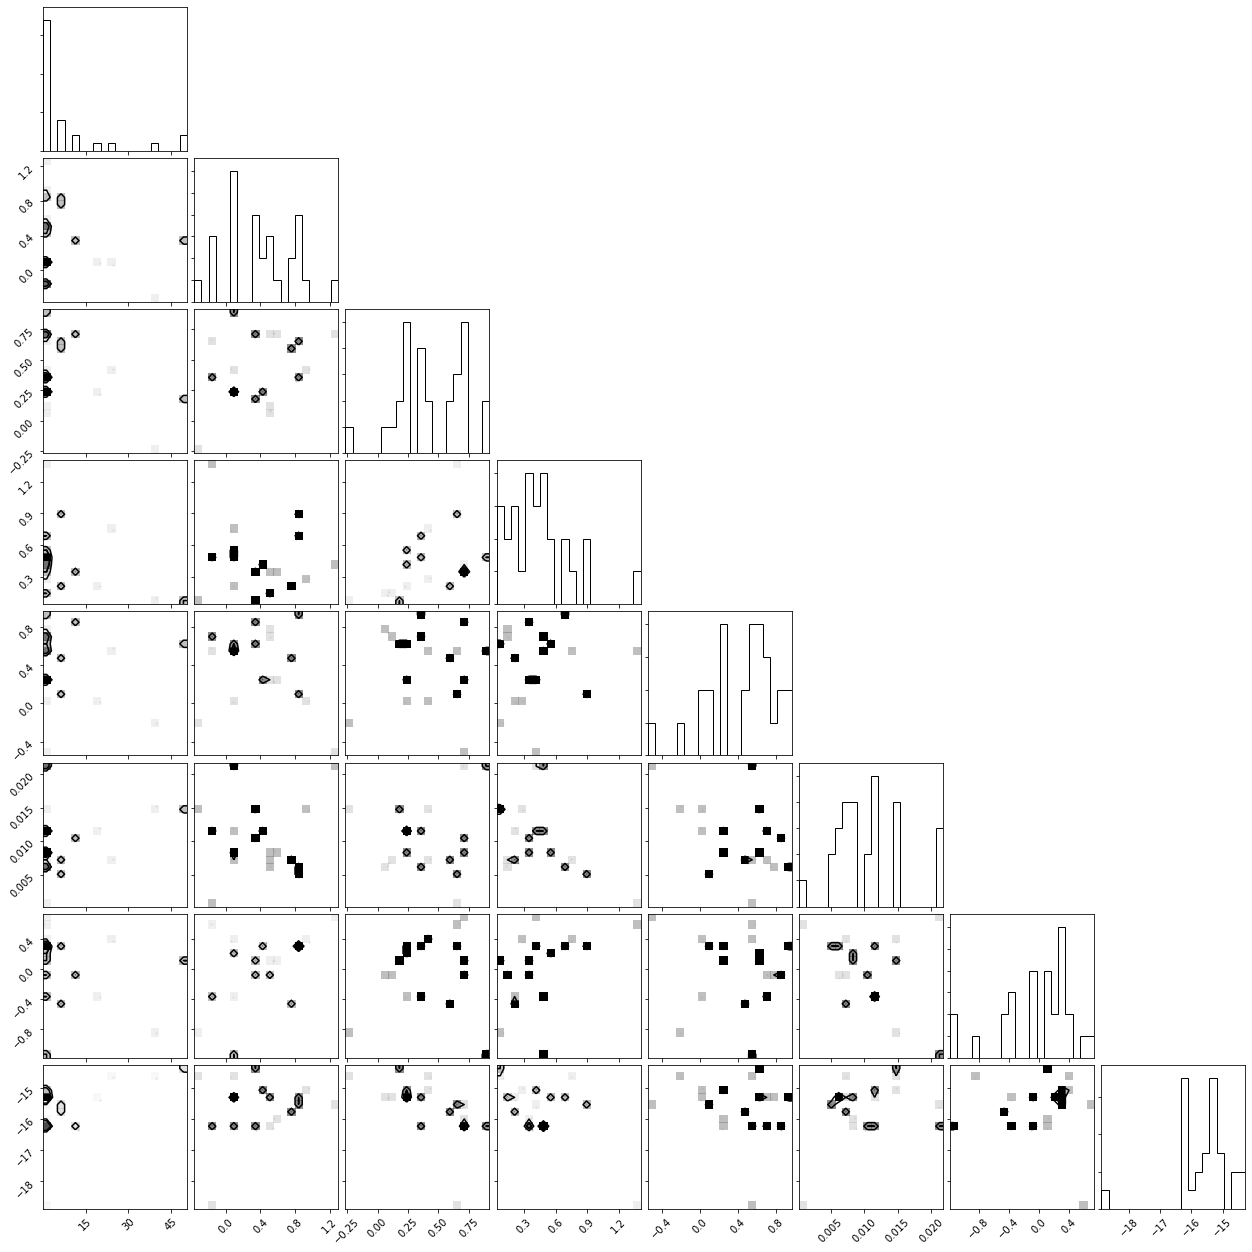

In [3]:
all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

corner.corner(all_samples)
plt.savefig("corner.pdf")

In [4]:
reader.accepted

array([0., 1., 0., 1., 1., 1., 0., 0., 1., 2., 2., 1., 1., 1.])

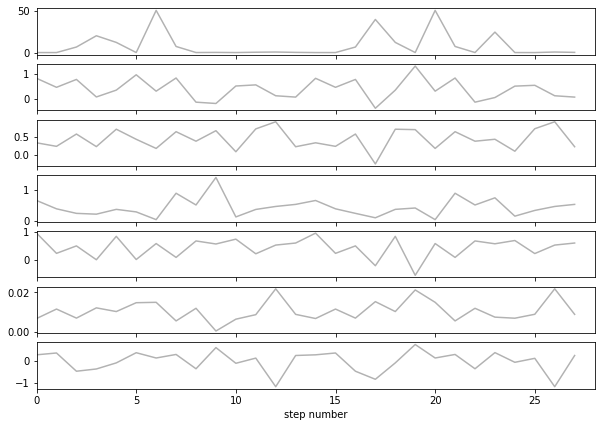

In [5]:
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
# labels = ["m", "b", "log(f)"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    # ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [6]:
blobs = sorted(Path('/Users/franceschi/mysims/IMLup/Til').glob('run_*.pickle'))

for filename in blobs:
    with open(filename, 'rb') as  fn:
        out = pickle.load(fn)
        print(out)

{'radmc_call': 'image incl 47.4 posang 54.599999999999994 npix 407 lambda 1.65 sizeau 800.0 setthreads 4', 'folder_path': 'test_1164929987/image_sca.fits'}
{'radmc_call': 'image incl 47.4 posang 54.599999999999994 npix 407 lambda 1.65 sizeau 800.0 setthreads 4', 'folder_path': 'test_1245774424/image_sca.fits'}
{'radmc_call': 'image incl 47.4 posang 54.599999999999994 npix 407 lambda 1.65 sizeau 800.0 setthreads 4', 'folder_path': 'test_1288703962/image_sca.fits'}
{'radmc_call': 'image incl 47.4 posang 54.599999999999994 npix 407 lambda 1.65 sizeau 800.0 setthreads 4', 'folder_path': 'test_1290076762/image_sca.fits'}
{'radmc_call': 'image incl 47.4 posang 54.599999999999994 npix 407 lambda 1.65 sizeau 800.0 setthreads 4', 'folder_path': 'test_1313936348/image_sca.fits'}
{'radmc_call': 'image incl 47.4 posang 54.599999999999994 npix 407 lambda 1.65 sizeau 800.0 setthreads 4', 'folder_path': 'test_1554657067/image_sca.fits'}
{'radmc_call': 'image incl 47.4 posang 54.599999999999994 npix 4

In [7]:
out

{'radmc_call': 'image incl 47.4 posang 54.599999999999994 npix 407 lambda 1.65 sizeau 800.0 setthreads 4',
 'folder_path': 'test_978363823/image_sca.fits'}